In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [88]:
data = pd.read_csv("Fraud.csv")

In [89]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


step: Maps a unit of time in the real world. In this case 1 step is 1 hour of time.
    
type: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
    
amount: amount of the transaction in local currency
    
nameOrig: customer who started the transaction
    
oldbalanceOrg: initial balance before the transaction
    
newbalanceOrig: customer's balance after the transaction.
    
nameDest: recipient ID of the transaction.
    
oldbalanceDest: initial recipient balance before the transaction.
    
newbalanceDest: recipient's balance after the transaction.
    
isFraud: identifies a fraudulent transaction (1) and non fraudulent (0)

In [91]:
data.head()   #first 5 recoords

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [92]:
data.tail()   #bottom 5 records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [97]:
data.shape   #dimension of the data, rows and columns

(6362620, 11)

In [99]:
data.info()  #entire information from no of rows, columns to non null count and type of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [101]:
data.describe()    #returns the statistical measures of the data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [102]:
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [105]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [107]:
data.duplicated().sum()

0

In [109]:
data.rename(columns={"newbalanceOrig":"newbalanceOrg"},inplace=True)
data.drop(labels=["nameOrig","nameDest"],axis=1,inplace=True)

In [111]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [113]:
data[["amount","oldbalanceOrg","newbalanceOrg","oldbalanceDest","newbalanceDest"]].min()

amount            0.0
oldbalanceOrg     0.0
newbalanceOrg     0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [115]:
data[["amount","oldbalanceOrg","newbalanceOrg","oldbalanceDest","newbalanceDest"]].max()

amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrg     4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

In [117]:
data[["amount","oldbalanceOrg","newbalanceOrg","oldbalanceDest","newbalanceDest"]].mean()

amount            1.798619e+05
oldbalanceOrg     8.338831e+05
newbalanceOrg     8.551137e+05
oldbalanceDest    1.100702e+06
newbalanceDest    1.224996e+06
dtype: float64

In [119]:
data[["amount","oldbalanceOrg","newbalanceOrg","oldbalanceDest","newbalanceDest"]].abs()

,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest
0,9839.64,170136.00,160296.36,0.00,0.00
1,1864.28,21249.00,19384.72,0.00,0.00
2,181.00,181.00,0.00,0.00,0.00
3,181.00,181.00,0.00,21182.00,0.00
4,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13
6362616,6311409.28,6311409.28,0.00,0.00,0.00
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,850002.52,850002.52,0.00,0.00,0.00


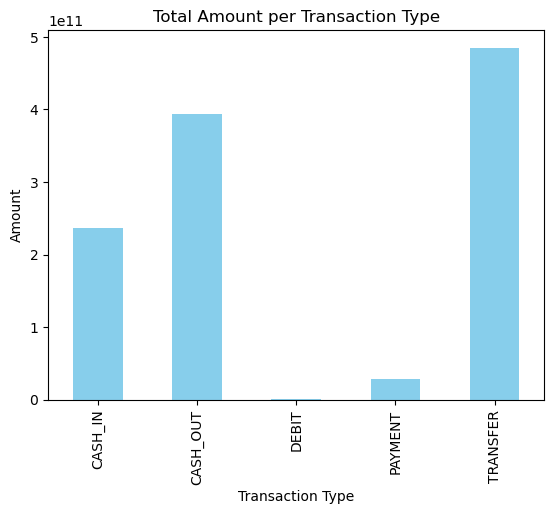

In [121]:
#grouping the data and summing up the amounts
var = data.groupby("type")["amount"].sum()

#plotting the data
var.plot(kind="bar",title="Total Amount per Transaction Type", xlabel="Transaction Type",ylabel="Amount",color="skyblue")

plt.show()

In [123]:
data.loc[data.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [125]:
#sns.heatmap(data.corr(),cmap="RdBu",annot=True)

OldbalanceOrg and NewbalanceOrg are highly correlated.

OldbalanceDest and NewbalanceDest are highly correlated.

Amount is correlated with isFraud(Target Variable).

In [128]:
fraud = data.loc[data.isFraud == 1]
fraud

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,2806.00,0.0,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,2806.00,0.0,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,20128.00,0.0,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0


In [130]:
nonfraud = data.loc[data.isFraud == 0]
nonfraud

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0,0
5,1,PAYMENT,7817.71,53860.0,46042.29,0.00,0.00,0,0
6,1,PAYMENT,7107.77,183195.0,176087.23,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,518802.0,510167.71,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,3859.0,0.00,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,168046.0,0.00,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,13492.0,0.00,0.00,82096.45,0,0


In [132]:
#sns.heatmap(fraud.corr(),cmap="RdBu",annot=True)

In [134]:
#sns.heatmap(nonfraud.corr(),cmap="RdBu",annot=True)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrg   float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


In [138]:
from sklearn.preprocessing import LabelEncoder

In [140]:
le = LabelEncoder()

In [142]:
data["type"] = le.fit_transform(data["type"])

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrg   float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(4)
memory usage: 436.9 MB


In [146]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [148]:
data["isFlaggedFraud"].unique()

array([0, 1])

In [150]:
data["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [152]:
data.drop(["isFlaggedFraud"],axis=1,inplace=True)

In [154]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1


In [156]:
x = data.drop(['isFraud'],axis=1)
y = data[['isFraud']]

In [158]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.00,160296.36,0.00,0.00
1,1,3,1864.28,21249.00,19384.72,0.00,0.00
2,1,4,181.00,181.00,0.00,0.00,0.00
3,1,1,181.00,181.00,0.00,21182.00,0.00
4,1,3,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00


In [160]:
y

,isFraud
0,0
1,0
2,1
3,1
4,0
...,...
6362615,1
6362616,1
6362617,1
6362618,1


In [162]:
from sklearn.model_selection import train_test_split

In [164]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [165]:
x_train

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest
6271196,619,0,386385.08,4669568.85,5055953.92,506035.06,119649.98
1888243,164,0,212458.78,234635.00,447093.78,806037.88,593579.10
5549957,382,3,19967.60,3634.00,0.00,0.00,0.00
2025342,180,1,527616.51,180216.00,0.00,92157.10,619773.61
682342,36,4,206067.85,0.00,0.00,2131494.48,2337562.32
...,...,...,...,...,...,...,...
1570006,155,0,129715.85,5054252.83,5183968.68,246692.94,116977.09
2234489,186,3,2459.70,0.00,0.00,0.00,0.00
4926484,350,1,10579.16,59279.00,48699.84,322754.16,333333.32
4304572,307,1,73020.76,20289.00,0.00,256102.84,329123.61


In [168]:
x_test

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest
3737323,278,0,330218.42,20866.00,351084.42,452419.57,122201.15
264914,15,3,11647.08,30370.00,18722.92,0.00,0.00
85647,10,0,152264.21,106589.00,258853.21,201303.01,49038.80
5899326,403,4,1551760.63,0.00,0.00,3198359.45,4750120.08
2544263,206,0,78172.30,2921331.58,2999503.88,415821.90,337649.60
...,...,...,...,...,...,...,...
2210524,186,3,917.99,9606.00,8688.01,0.00,0.00
956542,44,3,480.58,4683.00,4202.42,0.00,0.00
5474798,379,1,248511.67,507.00,0.00,23807.93,272319.61
878120,42,1,200008.65,0.00,0.00,589973.64,789982.29


In [170]:
y_train

,isFraud
6271196,0
1888243,0
5549957,0
2025342,0
682342,0
...,...
1570006,0
2234489,0
4926484,0
4304572,0


In [172]:
y_test

,isFraud
3737323,0
264914,0
85647,0
5899326,0
2544263,0
...,...
2210524,0
956542,0
5474798,0
878120,0


In [174]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rf = RandomForestClassifier()   #building a robot

In [178]:
rf.fit(x_train,y_train)   #training the robot

RandomForestClassifier()

In [179]:
y_pred = rf.predict(x_test)   #answer given by the robot

In [180]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
accuracy_score(y_test,y_pred)   #evaluation, comparing original answer with the models answer

0.9997273135909421

In [188]:
from sklearn.metrics import classification_report

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.80      0.88      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524

